<a href="https://colab.research.google.com/github/mamun216/Exploratory-data-analysis/blob/main/Black_friday_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Data Source

dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

# Black Friday Dataset EDA And Feature Engineering



## Cleaning and preparing the data for model training

## Import necessary libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [112]:
# Mount the drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading train and test data

In [113]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [114]:
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Append both train and test data to make one single dataframe

In [115]:
# Merge both train and test data by appending method
df = train_df.append(test_df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [116]:
# view dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


From information above we can see dataset contains 783667 rows/entries, 12 columns, 5 floattype columns, 4 integer type and 5 object type columns, 3 columns product_category 2, 3 and purchase have missing values.

In [117]:
# Show the statistical distribution of numerical columns
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


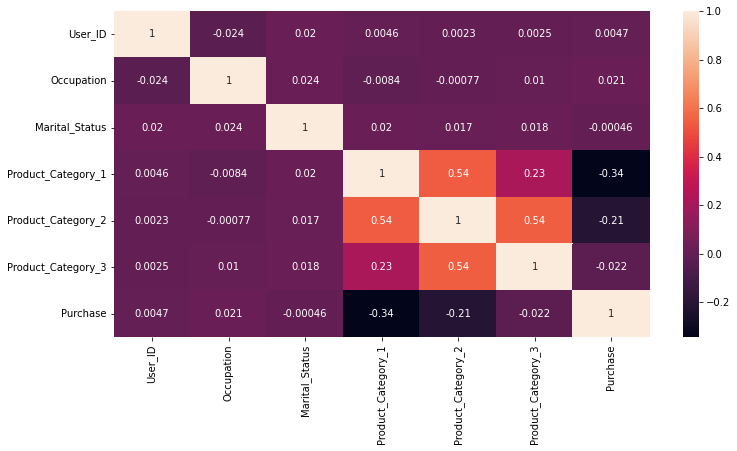

In [118]:
import matplotlib
matplotlib.rcParams['figure.figsize'] =(12,6)

sns.heatmap(df.corr(), annot = True);

Observation : Among Product_category1, 2 and 3 have positive correlation and with purchase variable there is negative correlation.


In [119]:
# drop the user id column as its not necessary for purchase prediction
df.drop(['User_ID'], axis=1, inplace = True)

In [120]:
# Handle Gender as categorical feature
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [121]:
# handle categorical feature age
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [122]:
# Mapping age variable to make machine feedable discrete data
df['Age'] = df['Age'].map({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6, '55+':7 })
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [123]:
# Or we can do by level encoding for whole categorical data

In [124]:
# Make city category in numeric format
df_city = pd.get_dummies(df['City_Category'], drop_first= True)
df_city.head()


,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [125]:
# Now concatenate two dataframe df_city and df to make one final clean dataframe
df = pd.concat([df, df_city], axis = 1)

In [126]:
# Drop city category
df.drop('City_Category', axis = 1, inplace = True)

In [127]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [128]:
# Missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Observation: Product_Category 2 & 3 has missing values, purchase feature that value is not missing value because when we concatenate test data with train data then null values added in bottom rows. Test dataset contain feature without purchase.

In [129]:
# focus on replacing missing values
# Find the unique value of product category
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [130]:
# check the number of data points in each product
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

Though the product_category value is discrete, so we can fill missing value with mode.

In [131]:
# show the mode
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [132]:
# fill missing value with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [133]:
# Check the missing value after filling with mode
df['Product_Category_2'].isnull().sum()

0

In [134]:
# Fill missing values for Product category 3
# Check the unique values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [135]:
# check the number of data points in each product
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [136]:
# Fill missing value with mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [137]:
# check the missing value status after filling
df['Product_Category_3'].isnull().sum()

0

In [138]:
# Total Number of rows and columns in dataset
df.shape

(783667, 12)

In [139]:
# check the feature stay in current city years unique value
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [140]:
# Replace + with empty string to make it unique for all points
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.replace('+', '')

In [141]:
# Convert object into integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

# check again datatype after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


observation: Features B & C are uint8 type where bit range from 0-255, that may be not enough to hold the data, so we need to change that datatype to int32/int64 to make more space.

In [142]:
# convert uint8(0-255) into int32 or int64 to give more space for data range.
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [143]:
# Remove product id feature, that is not needed for further analysis.
df.drop(['Product_ID'], axis=1, inplace = True)

In [144]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


Observation: Now our datset looks more cleaner than before. There is no missing values, no categorical value, all are numerical, so its ready for scalling the data to feed into the machine to train the model. We can see the features relationship view with visualization chart.

# Visualization

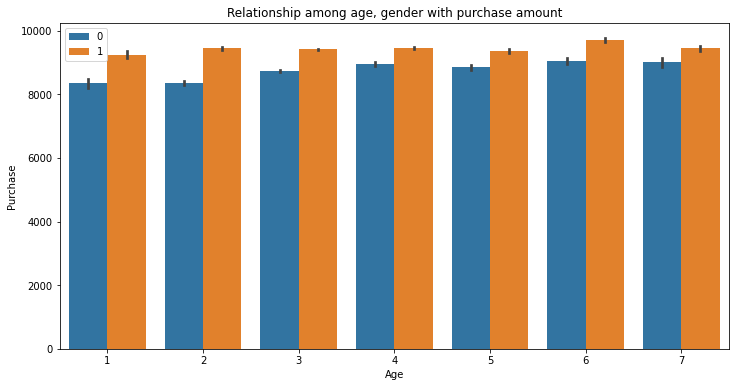

In [145]:
# Barplot
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df).set(title = "Relationship among age, gender with purchase amount")
plt.legend(loc='upper left');

Observation: All ages people from 0-55+ mostly are men purchase more than woman. Age group 6 purchase amount is highest.

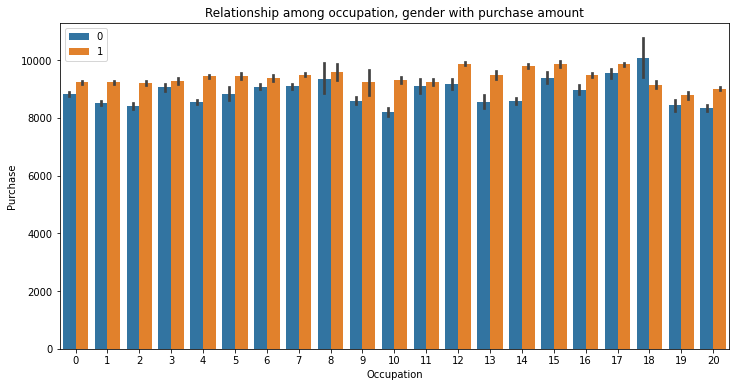

In [146]:
sns.barplot('Occupation', 'Purchase', hue = 'Gender', data = df).set(title = "Relationship among occupation, gender with purchase amount")
plt.legend(loc='upper left');

Observation: Here is also men highest than woman.

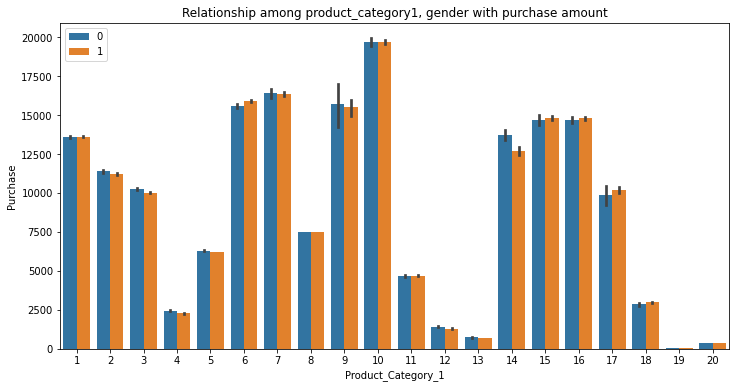

In [147]:
sns.barplot('Product_Category_1', 'Purchase', hue = 'Gender', data = df).set(title = "Relationship among product_category1, gender with purchase amount")
plt.legend(loc='upper left');

Observation: In case of product category men and women are close to each other. Also some product purchase rate is very high and some are very low. We can see that product category1 type 4,,5,12,13,19,20 is very low compare to 1,2,6,7,9,10,14,15 and 16.

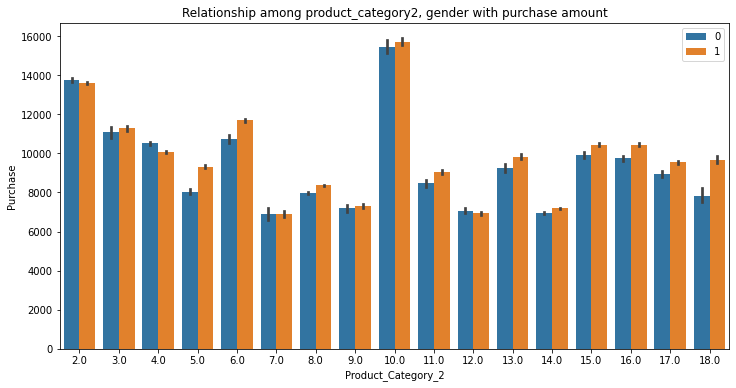

In [148]:
sns.barplot('Product_Category_2', 'Purchase', hue = 'Gender', data = df).set(title = "Relationship among product_category2, gender with purchase amount")
plt.legend(loc='upper right');

Observation: From Product_category2, 2 & 10 is the highest amount of purchase happened.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


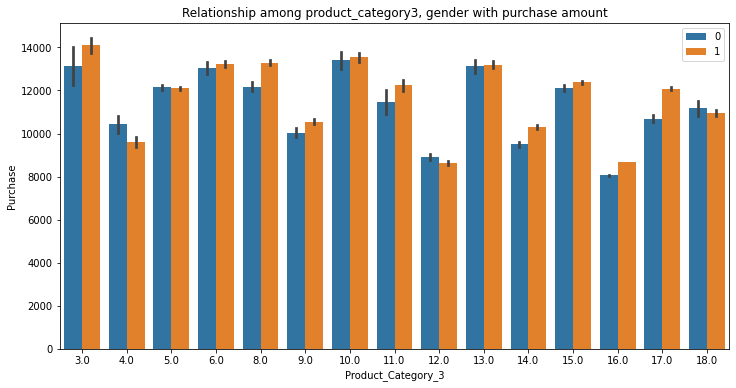

In [100]:
sns.barplot('Product_Category_3', 'Purchase', hue = 'Gender', data = df).set(title = "Relationship among product_category3, gender with purchase amount")
plt.legend(loc='upper right');

Observation: Product no3, 10 are the top sale.

# Split the data as train test for training data ready

In [101]:
df_test = df[df['Purchase'].isnull()]
df_train = df[-df['Purchase'].isnull()]

In [102]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [103]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [104]:
x = df_train.drop(['Purchase'], axis = 1)

In [105]:
x.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [106]:
x.shape

(550068, 10)

In [107]:
y = df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [108]:
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

## Feature scalling

In [109]:
## feature Scaling 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [110]:
## Now time to train the model..data is´ready to feed into the model..into ML algorithm.

In [149]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [150]:
# model prediction on test data
y_pred = model.predict(X_test)
y_pred

array([13917.41061111, 15037.3643828 ,  6525.77854401, ...,
       11631.24374074, 13127.08786444, 16148.80656432])

# Check the accuracy of the model with unseen test data

In [154]:
from sklearn import metrics

#y_true = [...] # Your real values / test labels
#y_pred = [...] # The predictions from your ML / RF model

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error (MAE): 2225.9777551364336
Mean Squared Error (MSE): 9337770.07364571
Root Mean Squared Error (RMSE): 3055.7765091128163


Observation: The mean Absolute error is very low. We can choose this model for right now to predict customer purchase amount in following month. But this is an idea how machine learning model works. 

# Conclusion
Here we made focus on feature engineering and EDA part only to make ready data for machine learning model building by training on the clean data. In real life, to make better prediction and right decision we need to try different algorithm, model, accuracy metrics and minimizing maximum error. 
By comparing different model and prameter, hypertuning, then we can choose the best model which give us best result of approximation for future prediction.
As it was my data analyst task, so I completed until here. In coming future I will play with ML model with this ready data.